Galaksi Morfoloji Tahmini
@author: Olca Orakcı
Kaggle Yarışması -- Ödül 16.000 USD (2014)
Galaxy Zoo - The Galaxy Challenge
Galip: sedielem RMSE:0.07491

# 1.Veri İşleme

## 1.1. Veri Tanımı

In [ ]:
import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import os
## Import the csv file containing file names and class probabilities 
galaxy_df = pd.read_csv('training_solutions_rev1.csv')
galaxy_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


## 1.2. Görüntü İşleme

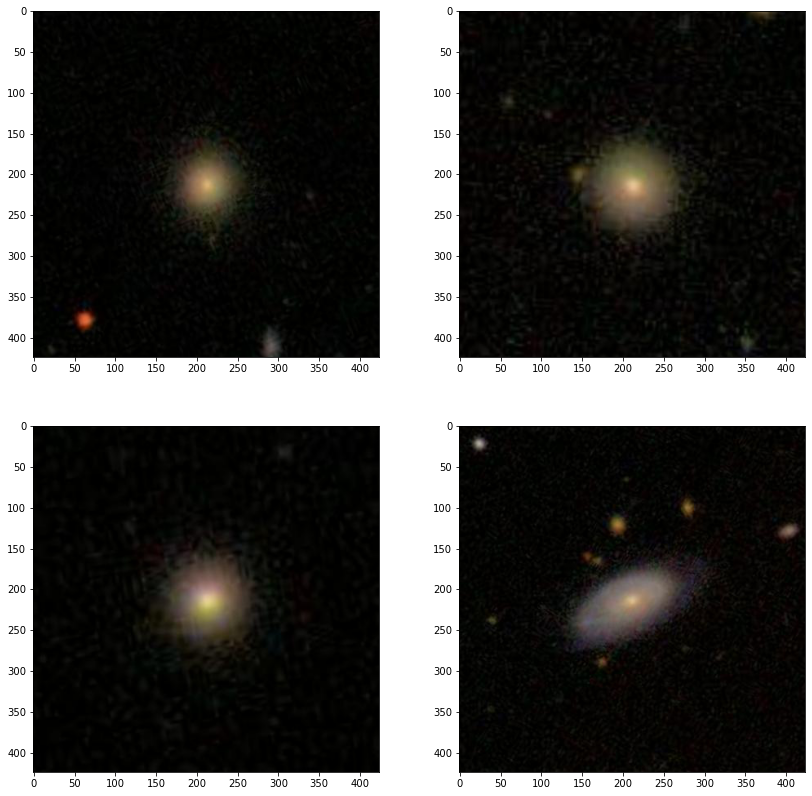

In [ ]:
## Previewing some random images for image size determination
image1 = mpl.image.imread('images_training_rev1/'+random.choice(os.listdir('images_training_rev1/')))
image2 = mpl.image.imread('images_training_rev1/'+random.choice(os.listdir('images_training_rev1/')))
image3 = mpl.image.imread('images_training_rev1/'+random.choice(os.listdir('images_training_rev1/')))
image4 = mpl.image.imread('images_training_rev1/'+random.choice(os.listdir('images_training_rev1/')))

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,14))
ax[0,0].imshow(image1)
ax[0,1].imshow(image2)
ax[1,0].imshow(image3)
ax[1,1].imshow(image4)

Now we will convert images into arrays, first we will crop the outer areas since the galaxy is 
generally in the middle, and we don't want other objects to effect the prediction. Then we will 
resize the data so that the algorithm will have an easier time to process the image.

(64, 64, 3)


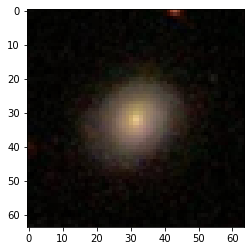

In [ ]:
## Lets start by defining an algoritm to transform our image into desired form and array

original_size = 424
cropped_size = 256
final_size = 64

def image_resize_crop(image_path,image_size,crop_size,resized_size):
    im = Image.open(image_path)

    left = (image_size - crop_size)/2
    top = (image_size - crop_size)/2
    right = (image_size + crop_size)/2
    bottom = (image_size + crop_size)/2
    im = im.crop((left, top, right, bottom))
    im = im.resize((resized_size,resized_size), Image.ANTIALIAS)
    return im,np.asarray(im)


plt.imshow(image_resize_crop('images_training_rev1/100008.jpg',original_size,cropped_size,final_size)[0])
print(image_resize_crop('images_training_rev1/100008.jpg',original_size,cropped_size,final_size)[1].shape)


In [ ]:
## Now we can create another function to convert whole training data into a np array
def data_creator(dataframe,image_size,crop_size,resized_size):
    df_array = dataframe.values
    data_id = df_array[:,0].astype(int).astype(str)
    Y_data = df_array[:,1:]
    X_data = []
    for i in data_id:
        x = image_resize_crop('images_training_rev1/'+i+'.jpg',image_size,crop_size,resized_size)[1]
        X_data.append(x)
    X_data = np.array(X_data)
    return X_data, Y_data
X, Y = data_creator(galaxy_df,original_size,cropped_size,final_size)
print (X.shape, Y.shape)

(61578, 64, 64, 3) (61578, 37)


In [ ]:
np.save('X.npy',X)
np.save('Y.npy',Y)

In [ ]:
## Lets create a higher resolution data for gpu computation.
original_size = 424
cropped_size = 256
final_size = 224
X_high, Y = data_creator(galaxy_df,original_size,cropped_size,final_size)
print (X_high.shape, Y.shape)

In [ ]:
np.save('X_high.npy',X_high)

## 1.3. Eğitim seti oluşturma

In [ ]:
import numpy as np
X = np.load('/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/X.npy')
Y = np.load('/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/Y.npy')

In [ ]:
import numpy as np
X = np.load('/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/X_high.npy')
Y = np.load('/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/Y.npy')

In [3]:
## We need to split our data for final performance testing
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=7)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
del X,Y

(43104, 64, 64, 3) (43104, 37) (18474, 64, 64, 3) (18474, 37)


In [ ]:
## To make the problem workable on Random forest we will change the images into greyscale
rgb_weights = [0.2989, 0.5870, 0.1140]
X = np.dot(X[...,:3], rgb_weights)
X.shape

(61578, 64, 64)

In [ ]:
## For Random Forest we need a 2-D Feature array
from sklearn.model_selection import train_test_split 
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=7)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
del X,Y

(43104, 4096) (43104, 37) (18474, 4096) (18474, 37)


# 2.Model Eğitimi

## 2.1. Ölçüm tipi seçimi

In [7]:
## We also need to introduce a Root Mean Square Error function since it is not built in sklearn library
def rmse(y_pred,y):
    return np.sqrt(np.mean(np.square(y - y_pred)))

## 2.2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=12,criterion='mse', max_depth=10,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, bootstrap=True, oob_score=False,
                               n_jobs=-1, random_state=None, verbose=2, warm_start=False,
                               ccp_alpha=0.0, max_samples=None)
rf_model.fit(X_train,Y_train)
Y_pred_rf = rf_model.predict(X_val)
rf_score = rmse(Y_pred_rf,Y_val)
print(rf_score)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 12building tree 2 of 12

building tree 3 of 12building tree 4 of 12

building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 22.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 22.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s finished


0.133798739405278


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=60,criterion='mse', max_depth=30,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, bootstrap=True, oob_score=False,
                               n_jobs=-1, random_state=None, verbose=2, warm_start=False,
                               ccp_alpha=0.0, max_samples=None)
rf_model.fit(X_train,Y_train)
Y_pred_rf = rf_model.predict(X_val)
rf_score = rmse(Y_pred_rf,Y_val)
print(rf_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 101.9min


building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 176.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   12.2s finished


0.1286958235269491


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,criterion='mse', max_depth=50,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, bootstrap=True, oob_score=False,
                               n_jobs=-1, random_state=None, verbose=2, warm_start=False,
                               ccp_alpha=0.0, max_samples=None)
rf_model.fit(X_train,Y_train)
Y_pred_rf = rf_model.predict(X_val)
rf_score = rmse(Y_pred_rf,Y_val)
print(rf_score)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 99.7min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 292.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   10.6s


0.1281802637583958


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   34.0s finished


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=180,criterion='mse', max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, bootstrap=True, oob_score=False,
                               n_jobs=-1, random_state=None, verbose=2, warm_start=False,
                               ccp_alpha=0.0, max_samples=None)
rf_model.fit(X_train,Y_train)
Y_pred_rf = rf_model.predict(X_val)
rf_score = rmse(Y_pred_rf,Y_val)
print(rf_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 180building tree 2 of 180building tree 3 of 180building tree 4 of 180



building tree 5 of 180
building tree 6 of 180
building tree 7 of 180
building tree 8 of 180
building tree 9 of 180
building tree 10 of 180
building tree 11 of 180
building tree 12 of 180
building tree 13 of 180
building tree 14 of 180
building tree 15 of 180
building tree 16 of 180
building tree 17 of 180
building tree 18 of 180
building tree 19 of 180
building tree 20 of 180
building tree 21 of 180
building tree 22 of 180
building tree 23 of 180
building tree 24 of 180
building tree 25 of 180
building tree 26 of 180
building tree 27 of 180
building tree 28 of 180
building tree 29 of 180
building tree 30 of 180
building tree 31 of 180
building tree 32 of 180
building tree 33 of 180
building tree 34 of 180
building tree 35 of 180
building tree 36 of 180
building tree 37 of 180


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 118.2min


building tree 38 of 180
building tree 39 of 180
building tree 40 of 180
building tree 41 of 180
building tree 42 of 180
building tree 43 of 180
building tree 44 of 180
building tree 45 of 180
building tree 46 of 180
building tree 47 of 180
building tree 48 of 180
building tree 49 of 180
building tree 50 of 180
building tree 51 of 180
building tree 52 of 180
building tree 53 of 180
building tree 54 of 180
building tree 55 of 180
building tree 56 of 180
building tree 57 of 180
building tree 58 of 180
building tree 59 of 180
building tree 60 of 180
building tree 61 of 180
building tree 62 of 180
building tree 63 of 180
building tree 64 of 180
building tree 65 of 180
building tree 66 of 180
building tree 67 of 180
building tree 68 of 180
building tree 69 of 180
building tree 70 of 180
building tree 71 of 180
building tree 72 of 180
building tree 73 of 180
building tree 74 of 180
building tree 75 of 180
building tree 76 of 180
building tree 77 of 180
building tree 78 of 180
building tree 79

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 580.8min


building tree 159 of 180
building tree 160 of 180
building tree 161 of 180
building tree 162 of 180
building tree 163 of 180
building tree 164 of 180
building tree 165 of 180
building tree 166 of 180
building tree 167 of 180
building tree 168 of 180
building tree 169 of 180
building tree 170 of 180
building tree 171 of 180
building tree 172 of 180
building tree 173 of 180
building tree 174 of 180
building tree 175 of 180
building tree 176 of 180
building tree 177 of 180
building tree 178 of 180
building tree 179 of 180
building tree 180 of 180


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 655.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  1.2min finished


0.12789829413700388


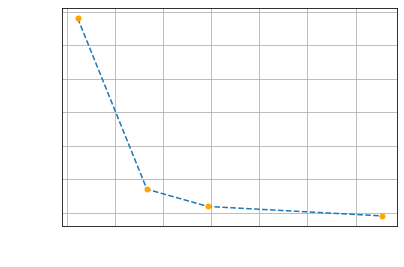

In [ ]:
## Check if we need to keep expanding the model
import matplotlib as mpl
import matplotlib.pyplot as plt
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
rf_times= [22.2,166.1,292.9,655.1]
rf_rmse = [0.133798739405278,0.1286958235269491,0.1281802637583958,0.12789829413700388]

plt.plot(rf_times,rf_rmse,ls='--',marker='.',mfc='orange',mec='orange',ms=10)
plt.xlabel('time(mins)')
plt.ylabel('score(rmse)')
plt.grid()


## 2.3. XGBoost

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
import time
time1 = time.time()
xgb_model = MultiOutputRegressor(XGBRegressor(objective ='reg:squarederror', 
                         learning_rate = 0.05 ,min_child_weight= 1, gamma= 0.3,
                         colsample_bytree=0.7 ,max_depth = 10, n_estimators = 12,n_jobs=-2))
xgb_model.fit(X_train,Y_train)
Y_pred_xgb = xgb_model.predict(X_val)
xgb_score = rmse(Y_pred_xgb,Y_val)
time2 = time.time()
print(xgb_score)
print((time2-time1)/60,'mins')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:94: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.2593951616556522
93.12687885761261 mins


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
import time
time1 = time.time()
xgb_model = MultiOutputRegressor(XGBRegressor(objective ='reg:squarederror', 
                         learning_rate = 0.05 ,min_child_weight= 1, gamma= 0.3,
                         colsample_bytree=0.7 ,max_depth = 30, n_estimators = 60,n_jobs=-2))
xgb_model.fit(X_train,Y_train)
Y_pred_xgb = xgb_model.predict(X_val)
xgb_score = rmse(Y_pred_xgb,Y_val)
time2 = time.time()
print(xgb_score)
print((time2-time1)/60,'mins')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:94: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.12584275539608514
1165.469171388944 mins


In [ ]:
Y_pred_xgb = xgb_model.predict(X_val)
xgb_score = rmse(Y_pred_xgb,Y_val[:,0])
xgb_score

0.28677193311145394

## 2.4. Deep Learning Modelleri

### 2.4.1. AlexNet (2012 ImageNet Kazananı)

In [ ]:
from tensorflow.keras import backend as K
def rmse_keras(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
#Instantiate an empty model
Alexnetmini_model = Sequential()

# 1st Convolutional Layer
Alexnetmini_model.add(Conv2D(filters=24, input_shape=(64,64,3), kernel_size=(11,11), strides=(2,2), padding='valid'))
Alexnetmini_model.add(Activation('relu'))
# Max Pooling
#Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
Alexnetmini_model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
Alexnetmini_model.add(Activation('relu'))
# Max Pooling
Alexnetmini_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
Alexnetmini_model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid'))
Alexnetmini_model.add(Activation('relu'))

# 4th Convolutional Layer
Alexnetmini_model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid'))
Alexnetmini_model.add(Activation('relu'))

# 5th Convolutional Layer
Alexnetmini_model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
Alexnetmini_model.add(Activation('relu'))
# Max Pooling
Alexnetmini_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
Alexnetmini_model.add(Flatten())
# 1st Fully Connected Layer
Alexnetmini_model.add(Dense(1024, input_shape=(64*64*3,)))
Alexnetmini_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
Alexnetmini_model.add(Dropout(0.4))

# 2nd Fully Connected Layer
Alexnetmini_model.add(Dense(1024))
Alexnetmini_model.add(Activation('relu'))
# Add Dropout
Alexnetmini_model.add(Dropout(0.4))

# 3rd Fully Connected Layer
Alexnetmini_model.add(Dense(250))
Alexnetmini_model.add(Activation('relu'))
# Add Dropout
Alexnetmini_model.add(Dropout(0.4))

# Output Layer
Alexnetmini_model.add(Dense(37))
Alexnetmini_model.add(Activation('sigmoid'))


Alexnetmini_model.summary()

# Compile the model
Alexnetmini_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[rmse_keras])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 27, 27, 24)        8736      
_________________________________________________________________
activation_129 (Activation)  (None, 27, 27, 24)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 17, 17, 64)        185920    
_________________________________________________________________
activation_130 (Activation)  (None, 17, 17, 64)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 6, 6, 96)          55392     
_________________________________________________________________
activation_131 (Activation)  (None, 6, 6, 96)        

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import time
time1 = time.time()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.00001)

Alexnetmini_model.fit(X_train,Y_train, batch_size=256,validation_split=0.2,
                  epochs=10, callbacks=[reduce_lr])

Y_pred_Alexnetmini = Alexnetmini_model.predict(X_val,batch_size=256,verbose=1)
Alexnetmini_score = rmse(Y_pred_Alexnetmini,Y_val)
time2 = time.time()
print(Alexnetmini_score)
print((time2-time1)/60,'mins')

Epoch 1/10
135/135 [==============================] - 632s 5s/step - loss: 0.3223 - rmse_keras: 0.1766 - val_loss: 0.2756 - val_rmse_keras: 0.1396 - lr: 0.0010
Epoch 2/10
135/135 [==============================] - 630s 5s/step - loss: 0.2789 - rmse_keras: 0.1440 - val_loss: 0.2675 - val_rmse_keras: 0.1326 - lr: 0.0010
Epoch 3/10
135/135 [==============================] - 646s 5s/step - loss: 0.2726 - rmse_keras: 0.1378 - val_loss: 0.2633 - val_rmse_keras: 0.1287 - lr: 0.0010
Epoch 4/10
135/135 [==============================] - 722s 5s/step - loss: 0.2671 - rmse_keras: 0.1317 - val_loss: 0.2613 - val_rmse_keras: 0.1261 - lr: 0.0010
Epoch 5/10
135/135 [==============================] - 645s 5s/step - loss: 0.2634 - rmse_keras: 0.1276 - val_loss: 0.2589 - val_rmse_keras: 0.1240 - lr: 0.0010
Epoch 6/10
135/135 [==============================] - 636s 5s/step - loss: 0.2605 - rmse_keras: 0.1242 - val_loss: 0.2568 - val_rmse_keras: 0.1211 - lr: 0.0010
Epoch 7/10
135/135 [====================

In [ ]:
Y_pred_Alexnetmini = Alexnetmini_model.predict(X_val,batch_size=256,verbose=1)
Alexnetmini_score = rmse(Y_pred_Alexnetmini,Y_val)
print(Alexnetmini_score)

73/73 [==============================] - 70s 960ms/step
0.11544705701782713


In [ ]:
## AlexNet (Yüksek Çözünürlük)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

def rmse_keras(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
#Instantiate an empty model
Alexnet_model = Sequential()

# 1st Convolutional Layer
Alexnet_model.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(2,2), padding='valid'))
Alexnet_model.add(Activation('relu'))
# Max Pooling
Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
Alexnet_model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
Alexnet_model.add(Activation('relu'))
# Max Pooling
Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
Alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
Alexnet_model.add(Activation('relu'))

# 4th Convolutional Layer
Alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
Alexnet_model.add(Activation('relu'))

# 5th Convolutional Layer
Alexnet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
Alexnet_model.add(Activation('relu'))
# Max Pooling
Alexnet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
Alexnet_model.add(Flatten())
# 1st Fully Connected Layer
Alexnet_model.add(Dense(4096, input_shape=(224*224*3,)))
Alexnet_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
Alexnet_model.add(Dropout(0.4))

# 2nd Fully Connected Layer
Alexnet_model.add(Dense(4096))
Alexnet_model.add(Activation('relu'))
# Add Dropout
Alexnet_model.add(Dropout(0.4))

# 3rd Fully Connected Layer
Alexnet_model.add(Dense(1000))
Alexnet_model.add(Activation('relu'))
# Add Dropout
Alexnet_model.add(Dropout(0.4))

# Output Layer
Alexnet_model.add(Dense(37))
Alexnet_model.add(Activation('sigmoid'))

Alexnet_model.summary()

# Compile the model
Alexnet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[rmse_keras])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 59, 59, 96)        34944     
_________________________________________________________________
activation_24 (Activation)   (None, 59, 59, 96)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 19, 19, 256)       2973952   
_________________________________________________________________
activation_25 (Activation)   (None, 19, 19, 256)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 384)        

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
path='/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5'
saveBestModel = ModelCheckpoint(path, monitor='val_rmse_keras', verbose=1, save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

Alexnet_model.fit(X_train,Y_train, batch_size=64,validation_split=0.2,
                  epochs=10, callbacks=[reduce_lr,saveBestModel])

Epoch 1/10
539/539 [==============================] - 18s 31ms/step - loss: 0.3695 - rmse_keras: 0.1806 - val_loss: 0.2776 - val_rmse_keras: 0.1435

Epoch 00001: val_rmse_keras improved from inf to 0.14354, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5
Epoch 2/10
539/539 [==============================] - 17s 31ms/step - loss: 0.2786 - rmse_keras: 0.1443 - val_loss: 0.2681 - val_rmse_keras: 0.1344

Epoch 00002: val_rmse_keras improved from 0.14354 to 0.13438, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5
Epoch 3/10
539/539 [==============================] - 17s 31ms/step - loss: 0.2663 - rmse_keras: 0.1328 - val_loss: 0.2630 - val_rmse_keras: 0.1286

Epoch 00003: val_rmse_keras improved from 0.13438 to 0.12857, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5
Epoch 4/10
539/539 [==============================] - 17s 31ms/step - loss: 0.2632 - rmse_keras: 0

In [ ]:
Alexnet_model.load_weights(path)
Alexnet_model.fit(X_train,Y_train, batch_size=128,validation_split=0.2,
                  epochs=10, callbacks=[reduce_lr,saveBestModel])

Epoch 1/10
270/270 [==============================] - 14s 51ms/step - loss: 0.2498 - rmse_keras: 0.1114 - val_loss: 0.2542 - val_rmse_keras: 0.1177

Epoch 00001: val_rmse_keras improved from 0.11864 to 0.11768, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5
Epoch 2/10
270/270 [==============================] - 14s 51ms/step - loss: 0.2481 - rmse_keras: 0.1091 - val_loss: 0.2522 - val_rmse_keras: 0.1152

Epoch 00002: val_rmse_keras improved from 0.11768 to 0.11515, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5
Epoch 3/10
270/270 [==============================] - 14s 51ms/step - loss: 0.2471 - rmse_keras: 0.1076 - val_loss: 0.2556 - val_rmse_keras: 0.1198

Epoch 00003: val_rmse_keras did not improve from 0.11515
Epoch 4/10
270/270 [==============================] - 14s 50ms/step - loss: 0.2460 - rmse_keras: 0.1059 - val_loss: 0.2540 - val_rmse_keras: 0.1178

Epoch 00004: val_rmse_keras did not impro

In [ ]:
Alexnet_model.load_weights(path)
Alexnet_model.fit(X_train,Y_train, batch_size=256,validation_split=0.2,
                  epochs=5, callbacks=[reduce_lr,saveBestModel])

Epoch 1/5
135/135 [==============================] - 15s 103ms/step - loss: 0.2390 - rmse_keras: 0.0952 - val_loss: 0.2514 - val_rmse_keras: 0.1142

Epoch 00001: val_rmse_keras improved from 0.11430 to 0.11420, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/alexnet.hdf5
Epoch 2/5
135/135 [==============================] - 13s 93ms/step - loss: 0.2390 - rmse_keras: 0.0951 - val_loss: 0.2514 - val_rmse_keras: 0.1142

Epoch 00002: val_rmse_keras did not improve from 0.11420
Epoch 3/5
135/135 [==============================] - 13s 93ms/step - loss: 0.2388 - rmse_keras: 0.0949 - val_loss: 0.2514 - val_rmse_keras: 0.1142

Epoch 00003: val_rmse_keras did not improve from 0.11420
Epoch 4/5
135/135 [==============================] - 13s 93ms/step - loss: 0.2387 - rmse_keras: 0.0948 - val_loss: 0.2514 - val_rmse_keras: 0.1142

Epoch 00004: val_rmse_keras did not improve from 0.11420
Epoch 5/5
135/135 [==============================] - 13s 93ms/step - loss: 0.2387 -

In [ ]:
Alexnet_model.load_weights(path)
Alexnet_model.fit(X_train,Y_train, batch_size=512,validation_split=0.2,
                  epochs=5, callbacks=[reduce_lr,saveBestModel])

Epoch 1/5
68/68 [==============================] - 15s 183ms/step - loss: 0.2389 - rmse_keras: 0.0951 - val_loss: 0.2514 - val_rmse_keras: 0.1142

Epoch 00001: val_rmse_keras did not improve from 0.11420
Epoch 2/5
68/68 [==============================] - 12s 175ms/step - loss: 0.2389 - rmse_keras: 0.0950 - val_loss: 0.2514 - val_rmse_keras: 0.1142

Epoch 00002: val_rmse_keras did not improve from 0.11420
Epoch 3/5
68/68 [==============================] - 12s 175ms/step - loss: 0.2388 - rmse_keras: 0.0948 - val_loss: 0.2514 - val_rmse_keras: 0.1143

Epoch 00003: val_rmse_keras did not improve from 0.11420
Epoch 4/5
68/68 [==============================] - 12s 174ms/step - loss: 0.2387 - rmse_keras: 0.0947 - val_loss: 0.2514 - val_rmse_keras: 0.1143

Epoch 00004: val_rmse_keras did not improve from 0.11420
Epoch 5/5
68/68 [==============================] - 12s 175ms/step - loss: 0.2388 - rmse_keras: 0.0948 - val_loss: 0.2514 - val_rmse_keras: 0.1143

Epoch 00005: val_rmse_keras did not i

In [ ]:
Alexnet_model.load_weights(path)
Y_pred_Alexnet = Alexnet_model.predict(X_val,batch_size=256,verbose=1)
Alexnet_score = rmse(Y_pred_Alexnet,Y_val)
print(Alexnet_score)

73/73 [==============================] - 2s 28ms/step
0.11412008215591082


### 2.4.2. Resnet(2015 ImageNet Kazananı)

In [ ]:
# Calling ResNet50 Convolutional layers from library
Resnet50_ = ResNet50(weights= None, include_top=False, input_shape= (64,64,3))# 1st Fully Connected Layer
Resnet50_.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K
def rmse_keras(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#Instantiate an empty model
Resnet_model = Sequential()

# Calling ResNet50 Convolutional layers from library
Resnet_model.add(ResNet50(weights= None, include_top=False, input_shape= (64,64,3)))

# Passing it to a Fully Connected layer
Resnet_model.add(Flatten())
# 1st Fully Connected Layer
Resnet_model.add(Dense(900, input_shape=(64*64*3,)))
Resnet_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
Resnet_model.add(Dropout(0.4))

# 2nd Fully Connected Layer
Resnet_model.add(Dense(900))
Resnet_model.add(Activation('relu'))
# Add Dropout
Resnet_model.add(Dropout(0.5))

# 3rd Fully Connected Layer
Resnet_model.add(Dense(250))
Resnet_model.add(Activation('relu'))
# Add Dropout
Resnet_model.add(Dropout(0.5))

# Output Layer
Resnet_model.add(Dense(37))
Resnet_model.add(Activation('sigmoid'))


Resnet_model.summary()

# Compile the model
Resnet_model.compile(loss='mse', optimizer='adam', metrics=[rmse_keras])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 900)               7373700   
_________________________________________________________________
activation_16 (Activation)   (None, 900)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 900)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 900)               810900    
_________________________________________________________________
activation_17 (Activation)   (None, 900)              

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
import time
path='/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50.hdf5'
saveBestModel = ModelCheckpoint(path, monitor='val_rmse_keras', verbose=1, save_best_only=True, mode='low')
reduce_lr = ReduceLROnPlateau(monitor='val_rmse_keras', factor=0.1, patience=4, min_lr=0.00001)
time1 = time.time()
Resnet_model.fit(X_train,Y_train, batch_size=256,validation_split=0.2,
                  epochs=30, callbacks=[reduce_lr,saveBestModel])
Resnet_model.load_weights(path)
Y_pred_Resnet = Resnet_model.predict(X_val,batch_size=256,verbose=1)
Resnet_score = rmse_keras(Y_pred_Resnet,Y_val)
time2 = time.time()
print(Resnet_score)
print((time2-time1)/60,'mins')

Epoch 1/30
135/135 [==============================] - ETA: 0s - loss: 0.0454 - rmse_keras: 0.2068
Epoch 00001: val_rmse_keras improved from inf to 0.16908, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/save.hdf5
135/135 [==============================] - 42s 308ms/step - loss: 0.0454 - rmse_keras: 0.2068 - val_loss: 0.0286 - val_rmse_keras: 0.1691
Epoch 2/30
135/135 [==============================] - ETA: 0s - loss: 0.0227 - rmse_keras: 0.1503
Epoch 00002: val_rmse_keras improved from 0.16908 to 0.14389, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/save.hdf5
135/135 [==============================] - 41s 301ms/step - loss: 0.0227 - rmse_keras: 0.1503 - val_loss: 0.0207 - val_rmse_keras: 0.1439
Epoch 3/30
135/135 [==============================] - ETA: 0s - loss: 0.0189 - rmse_keras: 0.1375
Epoch 00003: val_rmse_keras did not improve from 0.14389
135/135 [==============================] - 36s 265ms/step - loss: 0.0189 - rm

In [ ]:
time1 = time.time()
Resnet_model.fit(X_train,Y_train, batch_size=512,validation_split=0.2,
                  epochs=30, callbacks=[reduce_lr,saveBestModel])
Resnet_model.load_weights(path)
Y_pred_Resnet = Resnet_model.predict(X_val,batch_size=256,verbose=1)
Resnet_score = rmse_keras(Y_pred_Resnet,Y_val)
time2 = time.time()
print(Resnet_score)
print((time2-time1)/60,'mins')

Epoch 1/30
68/68 [==============================] - ETA: 0s - loss: 0.0087 - rmse_keras: 0.0932
Epoch 00001: val_rmse_keras improved from 0.10253 to 0.10214, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/save.hdf5
68/68 [==============================] - 40s 589ms/step - loss: 0.0087 - rmse_keras: 0.0932 - val_loss: 0.0104 - val_rmse_keras: 0.1021
Epoch 2/30
68/68 [==============================] - ETA: 0s - loss: 0.0086 - rmse_keras: 0.0929
Epoch 00002: val_rmse_keras improved from 0.10214 to 0.10214, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/save.hdf5
68/68 [==============================] - 41s 596ms/step - loss: 0.0086 - rmse_keras: 0.0929 - val_loss: 0.0104 - val_rmse_keras: 0.1021
Epoch 3/30
68/68 [==============================] - ETA: 0s - loss: 0.0086 - rmse_keras: 0.0925
Epoch 00003: val_rmse_keras did not improve from 0.10214
68/68 [==============================] - 35s 519ms/step - loss: 0.0086 - rmse_keras

In [ ]:
## Resnet (Yüksek çözünürlük)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
def rmse_keras(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#Instantiate an empty model
Resnet_model = Sequential()

# Calling ResNet50 Convolutional layers from library
Resnet_model.add(ResNet50(weights= None, include_top=False, input_shape= (128,128,3)))

# Passing it to a Fully Connected layer
Resnet_model.add(Flatten())
# 1st Fully Connected Layer
Resnet_model.add(Dense(4096, input_shape=(128*128*3,)))
Resnet_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
Resnet_model.add(Dropout(0.4))

# 2nd Fully Connected Layer
Resnet_model.add(Dense(4096))
Resnet_model.add(Activation('relu'))
# Add Dropout
Resnet_model.add(Dropout(0.5))

# 3rd Fully Connected Layer
Resnet_model.add(Dense(1000))
Resnet_model.add(Activation('relu'))
# Add Dropout
Resnet_model.add(Dropout(0.5))

# Output Layer
Resnet_model.add(Dense(37))
Resnet_model.add(Activation('sigmoid'))


Resnet_model.summary()

# Compile the model
Resnet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[rmse_keras])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              134221824 
_________________________________________________________________
activation (Activation)      (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
activation_1 (Activation)    (None, 4096)              0

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
path='/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5'
saveBestModel = ModelCheckpoint(path, monitor='val_rmse_keras', verbose=1, save_best_only=True, mode='low')
reduce_lr = ReduceLROnPlateau(monitor='val_rmse_keras', factor=0.1, patience=4, min_lr=0.00001)
Resnet_model.fit(X_train,Y_train, batch_size=64,validation_split=0.2,
                  epochs=30, callbacks=[reduce_lr,saveBestModel])


Epoch 1/30
539/539 [==============================] - 159s 273ms/step - loss: 0.6559 - rmse_keras: 0.1965 - val_loss: 0.2918 - val_rmse_keras: 0.1567

Epoch 00001: val_rmse_keras improved from inf to 0.15672, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5
Epoch 2/30
539/539 [==============================] - 149s 276ms/step - loss: 0.2849 - rmse_keras: 0.1483 - val_loss: 2.9270 - val_rmse_keras: 0.2837

Epoch 00002: val_rmse_keras did not improve from 0.15672
Epoch 3/30
539/539 [==============================] - 148s 274ms/step - loss: 0.2800 - rmse_keras: 0.1446 - val_loss: 0.3136 - val_rmse_keras: 0.1721

Epoch 00003: val_rmse_keras did not improve from 0.15672
Epoch 4/30
539/539 [==============================] - 147s 273ms/step - loss: 0.2762 - rmse_keras: 0.1387 - val_loss: 0.2608 - val_rmse_keras: 0.1260

Epoch 00004: val_rmse_keras improved from 0.15672 to 0.12604, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology 

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
path='/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5'
saveBestModel = ModelCheckpoint(path, monitor='val_rmse_keras', verbose=1, save_best_only=True, mode='low')
reduce_lr = ReduceLROnPlateau(monitor='val_rmse_keras', factor=0.1, patience=4, min_lr=0.00001)
Resnet_model.load_weights(path)
Resnet_model.fit(X_train,Y_train, batch_size=128,validation_split=0.2,
                  epochs=15, callbacks=[reduce_lr,saveBestModel])

Epoch 1/15
270/270 [==============================] - 143s 483ms/step - loss: 0.2532 - rmse_keras: 0.1154 - val_loss: 0.3165 - val_rmse_keras: 0.1724

Epoch 00001: val_rmse_keras improved from inf to 0.17242, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5
Epoch 2/15
270/270 [==============================] - 135s 497ms/step - loss: 0.2545 - rmse_keras: 0.1167 - val_loss: 0.2507 - val_rmse_keras: 0.1134

Epoch 00002: val_rmse_keras improved from 0.17242 to 0.11336, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5
Epoch 3/15
270/270 [==============================] - 135s 500ms/step - loss: 0.2530 - rmse_keras: 0.1136 - val_loss: 0.2639 - val_rmse_keras: 0.1302

Epoch 00003: val_rmse_keras did not improve from 0.11336
Epoch 4/15
270/270 [==============================] - 134s 498ms/step - loss: 0.2502 - rmse_keras: 0.1121 - val_loss: 0.2527 - val_rmse_keras: 0.1167

Epoch 00004: val_rmse_keras d

In [ ]:
Resnet_model.load_weights(path)
Resnet_model.fit(X_train,Y_train, batch_size=128,validation_split=0.2,
                  epochs=10, callbacks=[reduce_lr,saveBestModel])

Epoch 1/10
270/270 [==============================] - 135s 499ms/step - loss: 0.2388 - rmse_keras: 0.0955 - val_loss: 0.2408 - val_rmse_keras: 0.0990

Epoch 00001: val_rmse_keras did not improve from 0.09828
Epoch 2/10
270/270 [==============================] - 134s 497ms/step - loss: 0.2386 - rmse_keras: 0.0952 - val_loss: 0.2402 - val_rmse_keras: 0.0981

Epoch 00002: val_rmse_keras improved from 0.09828 to 0.09807, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5
Epoch 3/10
270/270 [==============================] - 135s 499ms/step - loss: 0.2381 - rmse_keras: 0.0943 - val_loss: 0.2402 - val_rmse_keras: 0.0980

Epoch 00003: val_rmse_keras improved from 0.09807 to 0.09801, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5
Epoch 4/10
270/270 [==============================] - 135s 498ms/step - loss: 0.2375 - rmse_keras: 0.0933 - val_loss: 0.2415 - val_rmse_keras: 0.1000

Epoch 00004: val_rmse_ker

In [ ]:
Resnet_model.load_weights(path)
Resnet_model.fit(X_train,Y_train, batch_size=256,validation_split=0.2,
                  epochs=10, callbacks=[reduce_lr,saveBestModel])

Epoch 1/10
135/135 [==============================] - 139s 1s/step - loss: 0.2352 - rmse_keras: 0.0897 - val_loss: 0.2403 - val_rmse_keras: 0.0982

Epoch 00001: val_rmse_keras did not improve from 0.09756
Epoch 2/10
135/135 [==============================] - 132s 977ms/step - loss: 0.2351 - rmse_keras: 0.0895 - val_loss: 0.2397 - val_rmse_keras: 0.0973

Epoch 00002: val_rmse_keras improved from 0.09756 to 0.09733, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5
Epoch 3/10
135/135 [==============================] - 133s 983ms/step - loss: 0.2346 - rmse_keras: 0.0886 - val_loss: 0.2399 - val_rmse_keras: 0.0974

Epoch 00003: val_rmse_keras did not improve from 0.09733
Epoch 4/10
135/135 [==============================] - 132s 977ms/step - loss: 0.2343 - rmse_keras: 0.0880 - val_loss: 0.2397 - val_rmse_keras: 0.0971

Epoch 00004: val_rmse_keras improved from 0.09733 to 0.09710, saving model to /content/drive/MyDrive/Astronomy/Galaxy Morphology

In [ ]:
path='/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50_hd.hdf5'
Resnet_model.load_weights(path)
Y_pred_Resnet = Resnet_model.predict(X_val,batch_size=256,verbose=1)
Resnet_score = rmse_keras(Y_pred_Resnet,Y_val)
print(Resnet_score)

73/73 [==============================] - 26s 236ms/step
tf.Tensor(0.09783316258527898, shape=(), dtype=float64)


## 2.5. Conv Xgboost (Ensemble Learning)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K
def rmse_keras(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#Instantiate an empty model
Resnet_model = Sequential()

# Calling ResNet50 Convolutional layers from library
Resnet_model.add(ResNet50(weights= None, include_top=False, input_shape= (64,64,3)))

# Passing it to a Fully Connected layer
Resnet_model.add(Flatten())
# 1st Fully Connected Layer
Resnet_model.add(Dense(900, input_shape=(64*64*3,)))
Resnet_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
Resnet_model.add(Dropout(0.4))

# 2nd Fully Connected Layer
Resnet_model.add(Dense(900))
Resnet_model.add(Activation('relu'))
# Add Dropout
Resnet_model.add(Dropout(0.5))

# 3rd Fully Connected Layer
Resnet_model.add(Dense(250))
Resnet_model.add(Activation('relu'))
# Add Dropout
Resnet_model.add(Dropout(0.5))

# Output Layer
Resnet_model.add(Dense(37))
Resnet_model.add(Activation('sigmoid'))

# Compile the model
Resnet_model.compile(loss='mse', optimizer='adam', metrics=[rmse_keras])
path='/content/drive/MyDrive/Astronomy/Galaxy Morphology Classifier/resnet50.hdf5'
Resnet_model.load_weights(path)

In [8]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
convxgb_model = MultiOutputRegressor(XGBRegressor(objective ='reg:squarederror',
                         learning_rate = 0.05 ,min_child_weight= 1, gamma= 0,
                         colsample_bytree=0.7 ,max_depth =5, n_estimators = 100))
Y_train_Resnet = Resnet_model.predict(X_train,batch_size=256,verbose=1)
convxgb_model.fit(Y_train_Resnet,Y_train)
Y_pred_Resnet = Resnet_model.predict(X_val,batch_size=256,verbose=1)
Y_pred_convxgb = convxgb_model.predict(Y_pred_Resnet)
convxgb_score = rmse(Y_pred_convxgb,Y_val)
print(convxgb_score)

0.10160627496797446


# 3.Sonuçlar

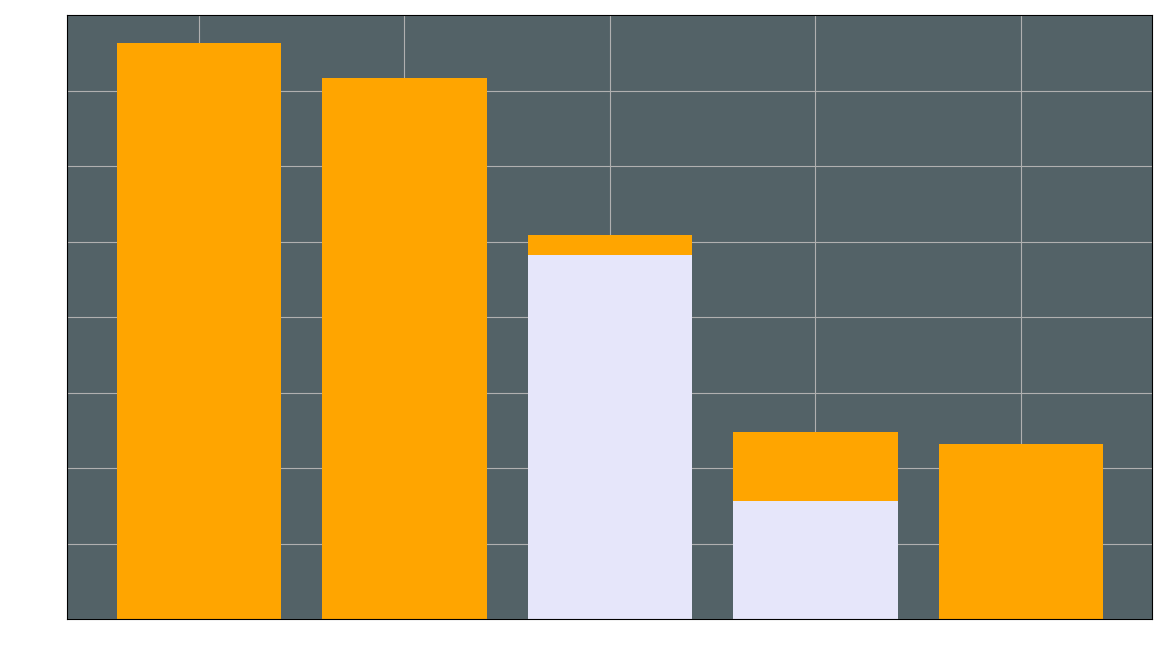

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

score_rf = [0.1281802637583958]
score_xg = [0.12584275539608514]
score_alexnet = [0.11544705701782713,0.11412008215591082]
score_resnet50 = [0.10237703221941635,0.09783316258527898]
score_convxgboost = [0.10160627496797446]

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
fig, ax = plt.subplots(figsize=(14,8),dpi=100)
ax.grid()
ax.set_axisbelow(True)
ax.bar(['Random Forest'],score_rf,color=['orange'], align='center')
ax.bar(['XGBoost'],score_xg,color=['orange'], align='center')
ax.bar(['Alexnet'],score_alexnet,color=['orange','lavender'], align='center')
ax.bar(['Resnet50'],score_resnet50,color=['orange','lavender'], align='center')
ax.bar(['ConvXGBoost'],score_convxgboost,color=['orange'], align='center')
ax.set_ylim([0.09, 0.13])
ax.set_facecolor('xkcd:gunmetal')